# Pendahuluan project

Sebelum memulai atau membuka usaha hal yang paling pertama dilakukan adalah analisis. Analisis dilakukan untuk mengetahui apakah nantinya usaha yang kita lakukan akan untung atau rugi. Tentunya kita tidak mau usaha yang kita lakukan mengalami kerugian karena itu hanya membuang waktu dan tentunya uang yang kita inves, maka dari itu analisis sangat berperan disini, dengan analisis kita bisa mengetahui kondisi lapangan dan mengetahui kesempatan yang bisa kita ambil lalu kembangkan untuk memperoleh keuntungan. Dengan analisis kita juga bisa mengetahui ancaman apa dan kerugian apa yang nantinya mungkin kita hadapi dan dengan analisis kita bisa menghindari hal tersebut.

Pada kali ini saya akan menganalisis jenis usaha ( Tempat Makan) apa yang cocok dibuka di sebuah kota Los Angeles, tempat makan ini nantinya menggunakan robot sebagai pelayannya sehingga bisa dibilang unik dari yang lain dan tentu modal yang dikeluarkan juga besar, oleh karena itu saya akan menganalisis jenis usaha apa yang cocok dibuka dengan menganalisis data terkait jenis-jenis usaha tempat makan di Los Angeles). Langkah yang saya lakukan adalah melihat jumlah penyebaran jenis usaha, melihat apakah jenis usaha merupakan waralaba atau tidak, setelah itu melihat lokasi mana yang penyebaran usaha (tempat makan ) paling banyak karena biasanya jika paling banyak penyebarannya itu merupakan pusat kuliner, dan lalu melihat di lokasi itu paling banyak tempat usaha jenis apa dan penyebaran kursinya baru setelah itu bisa memutuskan.

In [1]:
#import library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# memuat data set
df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/rest_data_us.csv')

In [3]:
#melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [4]:
df.head(5)

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [9]:
# memperbaiki nilai yang hilang, melakukan drop karena jumlah data hilang tidak banyak
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


#### Teliti proporsi dari berbagai jenis usaha. Buatlah grafiknya.

[Text(0, 0, '7253'),
 Text(0, 0, '1066'),
 Text(0, 0, '435'),
 Text(0, 0, '319'),
 Text(0, 0, '292'),
 Text(0, 0, '283')]

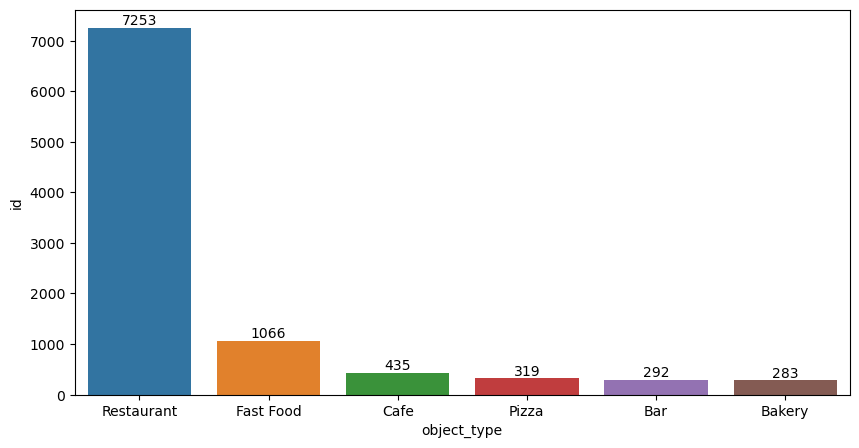

In [16]:
res = df.groupby('object_type')['id'].nunique().reset_index().sort_values(by='id',ascending=False)
plt.figure(figsize=(10,5))
ax = sns.barplot(data=res,x='object_type',y='id')
ax.bar_label(ax.containers[0])

#### Teliti proporsi dari usaha berbasis waralaba dan nonwaralaba. Buatlah grafiknya.

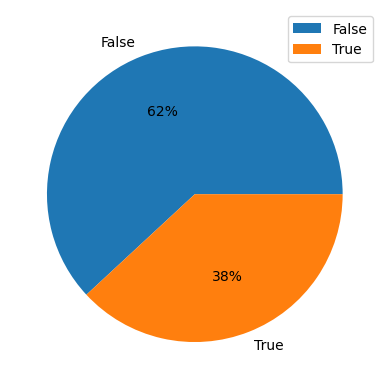

In [66]:
waralaba= df.groupby('chain')['id'].nunique().reset_index()
plt.pie(data = waralaba,labels='chain',x='id',autopct='%.0f%%')
plt.legend()


#### Jenis usaha manakah yang biasanya merupakan usaha berbasis waralaba?


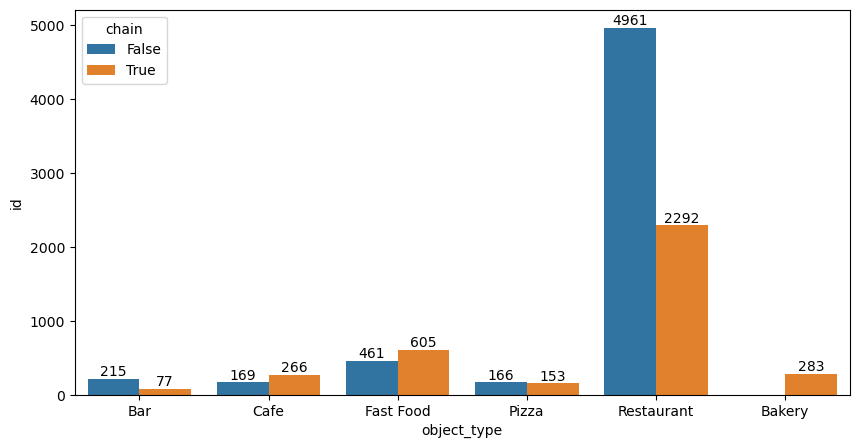

In [109]:
war = df.groupby(['chain','object_type']).agg({'id':'count'}).reset_index()
plt.figure(figsize=(10,5))
ax = sns.barplot(data=war,x='object_type',y='id',hue='chain')
for i in ax.containers:
    ax.bar_label(i,)

#### Mana yang merupakan ciri-ciri dari jenis usaha berbasis waralaba: memiliki banyak tempat dengan jumlah kursi yang sedikit atau memiliki beberapa tempat dengan jumlah kursi yang banyak?

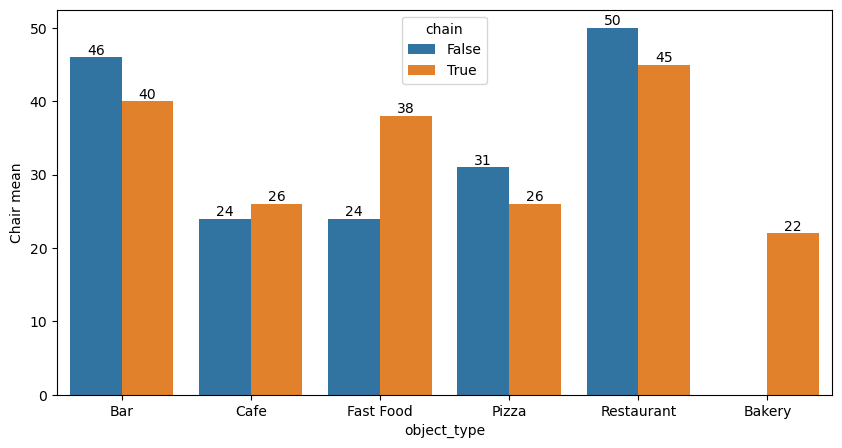

In [127]:
waralaba_chair = df.groupby(['chain','object_type']).agg({'number':'mean'}).round().reset_index()
plt.figure(figsize=(10,5))
ax = sns.barplot(data=waralaba_chair,x='object_type',y='number',hue='chain')
plt.ylabel('Chair mean')
for i in ax.containers:
    ax.bar_label(i,)


#### Tentukan jumlah rata-rata kursi untuk setiap jenis usaha. Secara rata-rata, jenis usaha manakah yang memiliki jumlah kursi terbanyak?

[Text(0, 0, '22'),
 Text(0, 0, '45'),
 Text(0, 0, '25'),
 Text(0, 0, '32'),
 Text(0, 0, '29'),
 Text(0, 0, '48')]

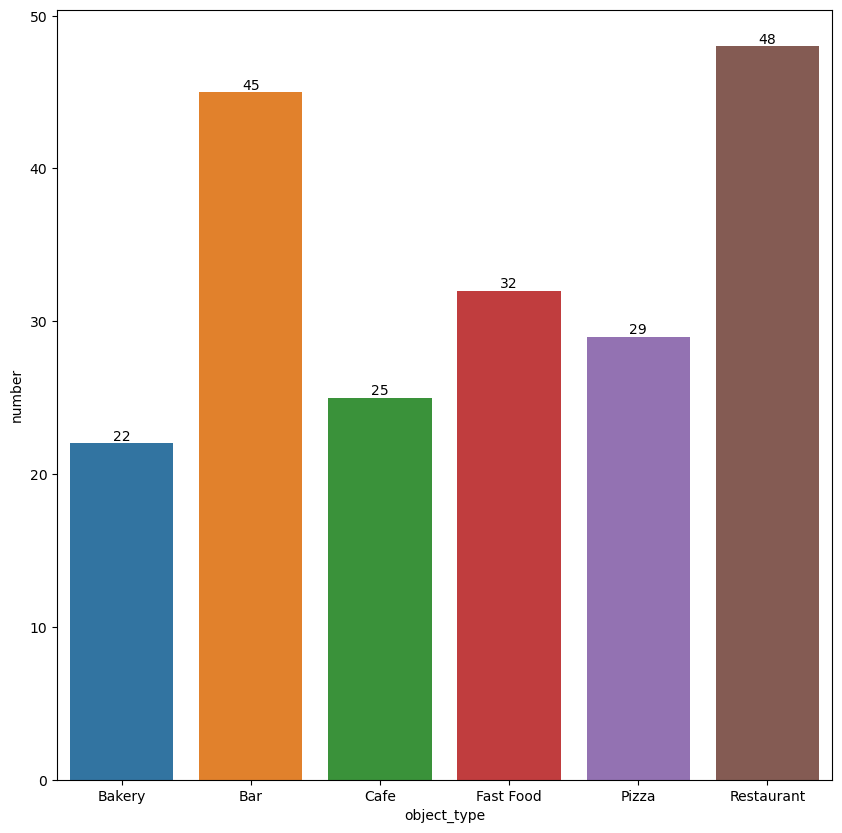

In [132]:
number_chair = df.groupby('object_type')['number'].mean().round().reset_index()
plt.figure(figsize=(10,10))
ax = sns.barplot(data=number_chair,x='object_type',y='number')
ax.bar_label(ax.containers[0])


#### Pindahkan data nama jalan dari kolom address ke kolom terpisah.

In [143]:
df

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [159]:
df['new_address'] = df['address'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df

,id,object_name,address,chain,object_type,number,new_address
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY # 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD # 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE 100


#### Buatlah grafik yang menampilkan sepuluh nama jalan teratas berdasarkan jumlah usaha (tempat makan).


[Text(0, 0, '296'),
 Text(0, 0, '288'),
 Text(0, 0, '167'),
 Text(0, 0, '161'),
 Text(0, 0, '148'),
 Text(0, 0, '146'),
 Text(0, 0, '145'),
 Text(0, 0, '135'),
 Text(0, 0, '134'),
 Text(0, 0, '128')]

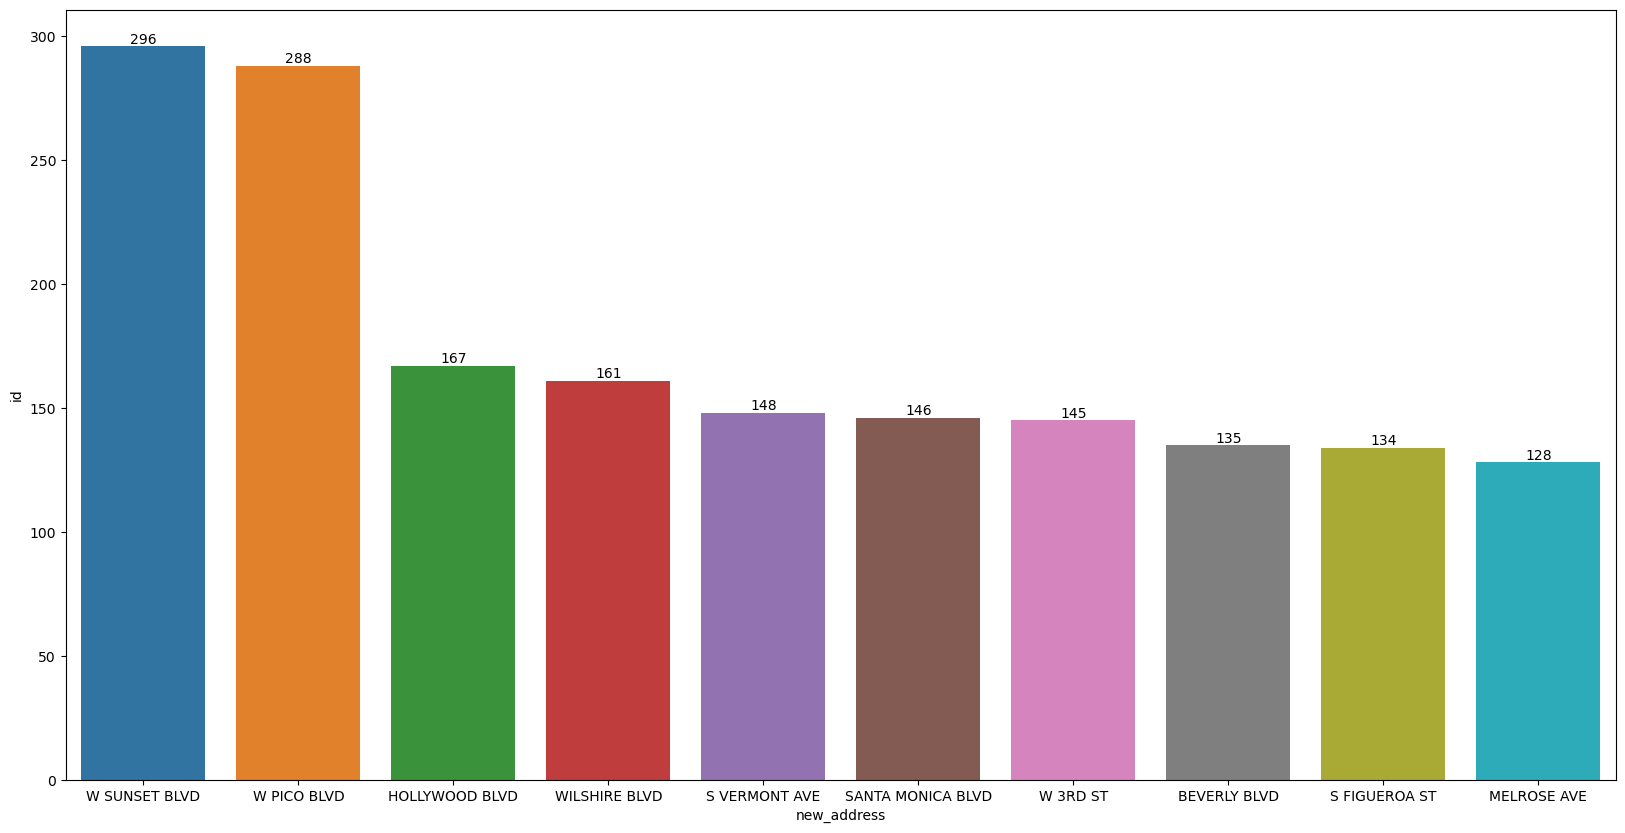

In [178]:
top_street = df.groupby('new_address')['id'].count().reset_index().sort_values(by='id',ascending=False).head(10)
plt.figure(figsize=(20,10))
ax = sns.barplot(data=top_street,x='new_address',y='id')
ax.bar_label(ax.containers[0])

#### Temukan jumlah jalan yang hanya memiliki satu usaha (tempat makan).

In [179]:
one = df.groupby('new_address')['id'].count().reset_index()
len(one[one['id']==1])

2481

#### Untuk jalan yang dihuni oleh banyak usaha (tempat makan), perhatikan distribusi jumlah kursinya. Tren apa yang bisa Anda amati?

In [184]:
#menggunakan jalan W SUNSET BLVD
crowded_way = df[df['new_address']=='W SUNSET BLVD']

[Text(0, 0, '68'),
 Text(0, 0, '61'),
 Text(0, 0, '57'),
 Text(0, 0, '33'),
 Text(0, 0, '7'),
 Text(0, 0, '14'),
 Text(0, 0, '9'),
 Text(0, 0, '13'),
 Text(0, 0, '8'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4')]

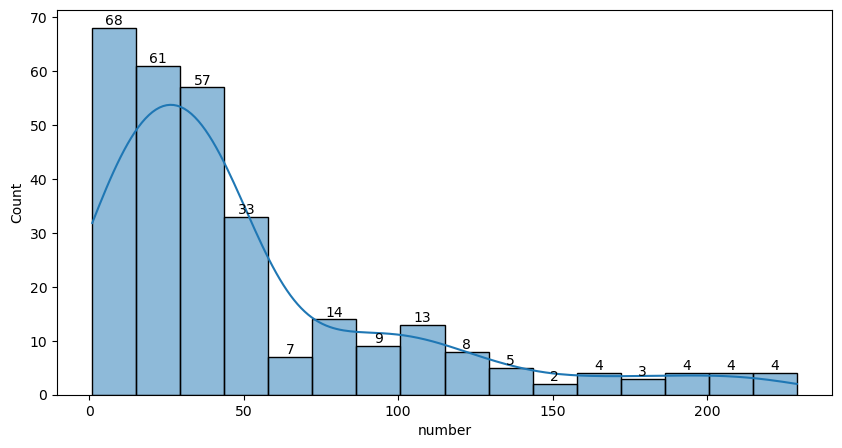

In [189]:
#distribusi kursi
plt.figure(figsize=(10,5))
ax = sns.histplot(data=crowded_way,x='number',kde=True)
ax.bar_label(ax.containers[0])

[Text(0, 0, '217'),
 Text(0, 0, '9'),
 Text(0, 0, '24'),
 Text(0, 0, '21'),
 Text(0, 0, '13'),
 Text(0, 0, '12')]

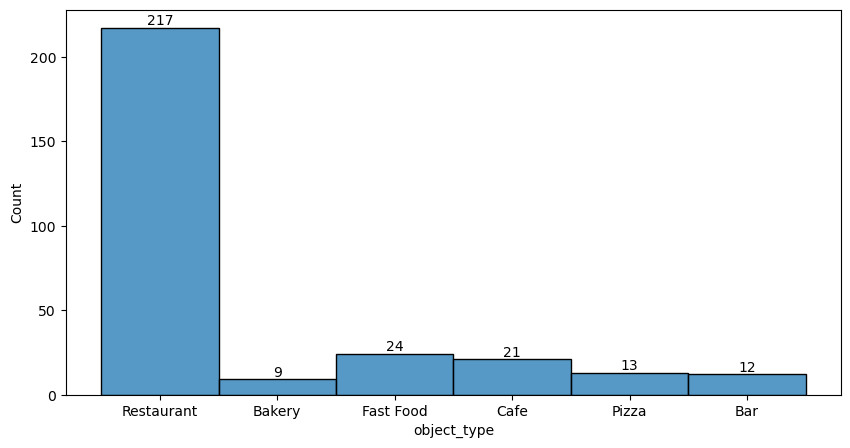

In [191]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=crowded_way,x='object_type')
ax.bar_label(ax.containers[0])